In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [8]:
X, y = make_blobs(random_state=42)
print(X.shape, y)

(100, 2) [2 1 0 1 2 1 0 1 1 0 0 2 2 0 0 2 2 0 2 2 0 2 2 0 0 0 1 2 2 2 2 1 1 2 0 0 0
 0 1 1 2 0 1 0 0 1 2 2 2 1 1 1 0 2 2 2 0 0 1 0 2 1 2 1 2 2 1 2 1 1 1 2 2 0
 1 2 1 2 1 1 0 1 0 2 0 0 0 1 0 1 1 1 0 1 0 0 0 1 2 0]


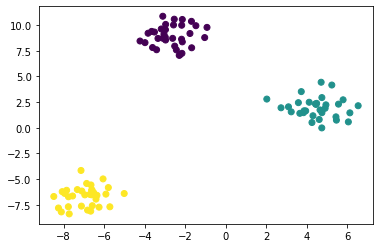

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
labels

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2], dtype=int32)

In [14]:
print("¿Hemos acertado en todas las etiquetas?", np.all(y == labels))
print("¿En cuantas hemos fallado?", np.sum(y != labels))

¿Hemos acertado en todas las etiquetas? False
¿En cuantas hemos fallado? 100


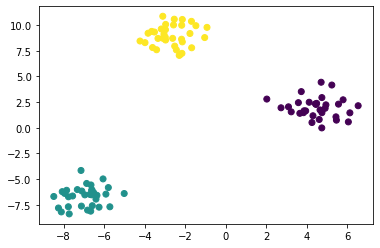

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=labels);

In [18]:
print('Porcentaje de precisión:', accuracy_score(y, labels))
print(confusion_matrix(y, labels))

Porcentaje de precisión: 0.0
[[ 0  0 34]
 [33  0  0]
 [ 0 33  0]]


In [20]:
adjusted_rand_score(y, labels)

1.0

<div class="alert alert-success">
    <b>EJERCICIO: agrupamiento de dígitos</b>:
     <ul>
      <li>
      Aplica agrupamiento K-means a los datos de los dígitos, buscando 10 dígitos. Visualiza los centros como imágenes (es decir, redimensiona cada uno a 8x8 y usa ``plt.imshow``). ¿Te parece que los grupos estén relacionados con algunos dígitos particulares? ¿Qué valores de ``adjusted_rand_score`` obtienes?
      </li>
      <li>
      Visualiza los dígitos proyectados como se hizo en el ejemplo anterior pero, esta vez, utiliza las etiquetas que proporciona KMeans como colores. ¿Qué observas?
      </li>
    </ul>
</div>

In [51]:
digits = load_digits()

X,y = digits.data, digits.target
print(X.shape)

(1797, 64)


Buscamos cual es el numero de cluster que debemos utilizar. En este caso ya tenemos una idea de que deberian ser 10, porque tenemos 10 numeros. Pero normalmente en aprendizaje no supervisado no sabemos la cantidad de etiquetas que tenemos. 

In [52]:
inercia = []

for i in range(1,20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', 
                      max_iter= 300, n_init = 10)
    algoritmo.fit(X)
    inercia.append(algoritmo.inertia_)

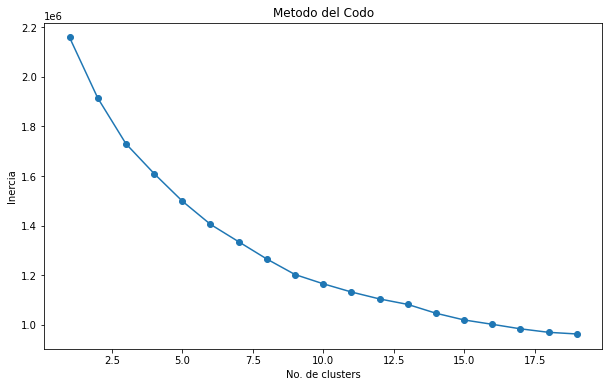

In [53]:
plt.figure(figsize=[10,6])
plt.title('Metodo del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1,20)),inercia,marker='o')
plt.show()

In [58]:
algoritmo = KMeans(n_clusters = 10, init = 'k-means++', 
                      max_iter= 300, n_init = 10)

algoritmo.fit(X)

centroides,etiquetas= algoritmo.cluster_centers_, algoritmo.labels_



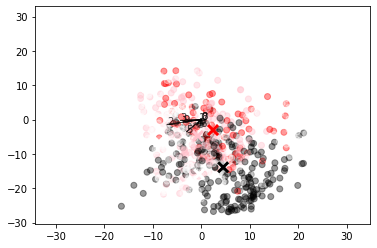

In [61]:
modelo_pca = PCA(n_components=2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X)

#Aplico la reduccion de dimensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

#Defino los colores de cada cluster
colores = ['blue', 'yellow', 'green', 'orange', 'gray', 'brown', 'purple','black','pink', 'red']

#Asigno colores a cada cluster
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

#Grafico los componentes PCA
plt.scatter(pca[:,0], pca[:,1], c = colores_cluster, 
           marker='o', alpha=0.4)

#Grafico los centroides
plt.scatter(centroides_pca[:,0],centroides_pca[:,1],
           marker='x', s=100, linewidths = 3, c = colores)

#Se guardan los datos en una variable para que sea facil de escribir el codigo
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = digits.target_names

#Se grafican los nombres de los clusteres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0,0,xvector[i], yvector[i],color='black',
              head_width=0.02,alpha=0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i],columnas[i], color='black', alpha=0.75)

In [50]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


###Preguntas
Porque los centroides no estan tan bien en los cluster? 
Como se que se etiquetaron correctamente todos los datos?
Como se usa PCA y para que sirve? 
